DESCRIPTION

Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

Analysis Tasks to be performed:

Import the three datasets
Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
User Age Distribution
User rating of the movie “Toy Story”
Top 25 movies by viewership rating
Find the ratings for all the movies reviewed by for a particular user of user id = 2696
Feature Engineering:
            Use column genres:

Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
Determine the features affecting the ratings of any particular movie.
Develop an appropriate model to predict the movie ratings

In [58]:
import numpy as np
from pandas import read_csv, DataFrame #, crosstab
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [2]:
mov = DataFrame(np.loadtxt('movies.dat', delimiter="::", 
                 dtype=str, comments=None), 
                columns=['MovieID','Title','Genres'])
# usr = DataFrame(np.loadtxt('users.dat', delimiter="::", 
#                  dtype=object, comments=None, usecols=(0,1,2,3)), 
#                 columns=['UserID','Gender','Age','Occupation'])
# rat = DataFrame(np.loadtxt('ratings.dat', delimiter="::", 
#                  dtype=object, comments=None, usecols=(0,1,2)), 
#                 columns=['UserID','MovieID','Rating'])
mov.MovieID = mov.MovieID.astype(int)
# usr.UserID, usr.Age = usr.UserID.astype(int), usr.Age.astype(int)
# rat.UserID, rat.MovieID = rat.UserID.astype(int), rat.MovieID.astype(int)
# rat.merge(mov, how='inner', on='MovieID').merge(usr, how='inner', on='UserID').to_csv('mvln.csv')

In [15]:
mlen = read_csv('mvln.csv', usecols=range(1,9) )

In [4]:
mlen.Age.value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

Text(0, 0.5, 'Number of people')

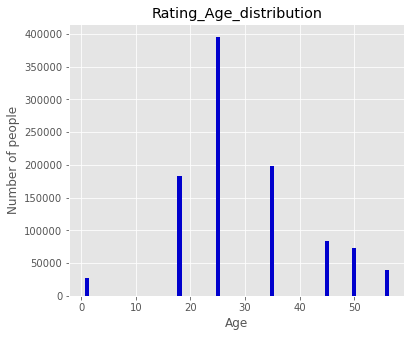

In [75]:
#.plot(kind='hist', bins=10)
agedis = mlen.Age.value_counts()
plt.figure(figsize=(6,5))
plt.bar(x=agedis.index, height=agedis.values, color='mediumblue')
plt.title('Rating_Age_distribution')
plt.xlabel('Age')
plt.ylabel('Number of people')

Text(0, 0.5, 'Number of Ratings')

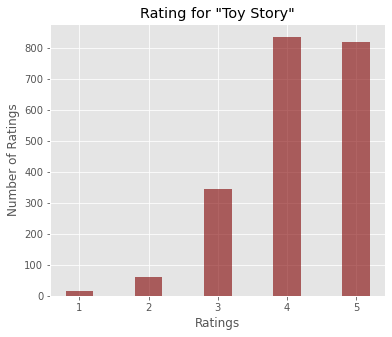

In [74]:
# Toy Story rating
mlnr = mlen.Rating[mlen.MovieID == 1]
tsr = mlnr.value_counts()
plt.figure(figsize=(6,5))
plt.bar(x=tsr.index, height=tsr.values, width=0.4, alpha=0.6, color='maroon')
plt.title('Rating for "Toy Story"')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')

In [7]:
# mean-rating is used to sort top 25 movies 
top25 = mlen.loc[:,('MovieID', 'Rating')]
top = top25.groupby(['MovieID']).mean().sort_values(by=['Rating'],ascending=False)
indx25 =top.iloc[:25,].index

In [8]:
srt25 = mov.MovieID[mov.MovieID.isin(indx25)]
#[np.where(srt25==mid)[0][0] for mid in indx25]
mov[mov.MovieID.isin(indx25)].iloc[[np.where(srt25==mid)[0][0] for mid in indx25]]

,MovieID,Title,Genres
977,989,Schlafes Bruder (Brother of Sleep) (1995),Drama
3811,3881,Bittersweet Motel (2000),Documentary
1762,1830,Follow the Bitch (1998),Comedy
3313,3382,Song of Freedom (1936),Drama
777,787,"Gate of Heavenly Peace, The (1995)",Documentary
3211,3280,"Baby, The (1973)",Horror
3538,3607,One Little Indian (1973),Comedy|Drama|Western
3164,3233,Smashing Time (1967),Comedy
3103,3172,Ulysses (Ulisse) (1954),Adventure
3587,3656,Lured (1947),Crime


In [14]:
# userid:2696  ratings for the respective movies
#dict((x[0],x[1]) for x in  mlen.groupby(['UserID']))[2696][['Title','Rating']]
mlen[mlen['UserID']==2696][['Title','Rating']]

,Title,Rating
953847,Back to the Future (1985),2
953848,E.T. the Extra-Terrestrial (1982),3
953849,L.A. Confidential (1997),4
953850,Lone Star (1996),5
953851,JFK (1991),1
953852,"Talented Mr. Ripley, The (1999)",4
953853,Midnight in the Garden of Good and Evil (1997),4
953854,Cop Land (1997),3
953855,Palmetto (1998),4
953856,"Perfect Murder, A (1998)",4


In [10]:
# Unique genres
genres = []
for xx in np.char.rsplit(a=mov.Genres.unique().astype(str), sep='|'): genres.extend(xx)
unqgenr = np.unique(genres)
unqgenr

array(['Action', 'Adventure', 'Animation', "Children's", 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype='<U11')

In [24]:
#one-hot encoding of each genres
for gnr in unqgenr: mlen[gnr] = mlen.Genres.isin([gnr]).astype(int)

In [16]:
# mlen.Gender[mlen.Gender=='M'] = 0
# mlen.Gender[mlen.Gender=='F'] = 1
# mlen.Gender = mlen.Gender.astype(int)
mlen.Gender.replace(['M','F'],[0,1], inplace=True)

In [17]:
mlen.Gender.dtype

dtype('int64')

In [20]:
# most relevant feature for predecting ratings
ratRelavent = mlen[['Rating', 'Gender', 'Age', 'Occupation']]
ratRelavent.corr()
#Age

,Rating,Gender,Age,Occupation
Rating,1.000000,0.019861,0.056869,0.006753
Gender,0.019861,1.000000,0.003189,-0.114974
Age,0.056869,0.003189,1.000000,0.078371
Occupation,0.006753,-0.114974,0.078371,1.000000


In [35]:

x = mlen.iloc[:,5:]
y = mlen['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model1 = OLS(y_train, x_train)
model = model1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.824
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                          1.782e+05
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                        0.00
Time:                        17:53:59   Log-Likelihood:                     -1.4987e+06
No. Observations:              800167   AIC:                                  2.997e+06
Df Residuals:                  800146   BIC:                                  2.998e+06
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender          0.6256      0.004    155.691      0.000       0.618       0.633
Age             0.0806   9.19e-05    877.415      0.000       0.080       0.081
Occupation      0.0635      0.000    250.158      0.000       0.063       0.064
Action          0.3418      0.016     21.361      0.000       0.310       0.373
Adventure       0.2217      0.043      5.160      0.000       0.138       0.306
Animation       1.4757      0.082     18.022      0.000       1.315       1.636
Children's      0.1996      0.103      1.947      0.052      -0.001       0.401
Comedy          0.5057      0.005     92.266      0.000       0.495       0.516
Crime           0.7408      0.041     18.275      0.000       0.661       0.820
Documentary     0.8191      0.022     36.573      0.000       0.775       0.863
Drama           0.5890      0.006    104.109      0.000       0.578       0.600
Fantasy         1.1786      1.575      0.748      0.454      -1.908       4.265
Film-Noir       0.7837      0.062     12.582      0.000       0.662       0.906
Horror          0.1343      0.012     11.281      0.000       0.111       0.158
Musical         0.2780      0.031      8.949      0.000       0.217       0.339
Mystery         0.4628      0.052      8.975      0.000       0.362       0.564
Romance         0.1390      0.038      3.619      0.000       0.064       0.214
Sci-Fi          0.3917      0.025     15.734      0.000       0.343       0.440
Thriller        0.4706      0.013     35.231      0.000       0.444       0.497
War             0.1786      0.056      3.174      0.002       0.068       0.289
Western         0.4611      0.023     19.724      0.000       0.415       0.507
==============================================================================
Omnibus:                     8270.618   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8218.372
Skew:                          -0.231   Prob(JB):                         0.00
Kurtosis:                       2.818   Cond. No.                     2.95e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Dropping cloumns children's and fantasy

In [55]:
x = mlen.iloc[:,5:].drop(["Children's",'Fantasy'],axis=1)
y = mlen['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model1 = OLS(y_train, x_train)
model = model1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.824
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                          1.970e+05
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                        0.00
Time:                        18:29:45   Log-Likelihood:                     -1.4987e+06
No. Observations:              800167   AIC:                                  2.997e+06
Df Residuals:                  800148   BIC:                                  2.998e+06
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender          0.6257      0.004    155.717      0.000       0.618       0.634
Age             0.0806   9.19e-05    877.437      0.000       0.080       0.081
Occupation      0.0635      0.000    250.171      0.000       0.063       0.064
Action          0.3417      0.016     21.357      0.000       0.310       0.373
Adventure       0.2216      0.043      5.159      0.000       0.137       0.306
Animation       1.4757      0.082     18.021      0.000       1.315       1.636
Comedy          0.5057      0.005     92.256      0.000       0.495       0.516
Crime           0.7408      0.041     18.273      0.000       0.661       0.820
Documentary     0.8191      0.022     36.570      0.000       0.775       0.863
Drama           0.5889      0.006    104.098      0.000       0.578       0.600
Film-Noir       0.7836      0.062     12.581      0.000       0.662       0.906
Horror          0.1343      0.012     11.276      0.000       0.111       0.158
Musical         0.2780      0.031      8.946      0.000       0.217       0.339
Mystery         0.4628      0.052      8.973      0.000       0.362       0.564
Romance         0.1389      0.038      3.617      0.000       0.064       0.214
Sci-Fi          0.3916      0.025     15.731      0.000       0.343       0.440
Thriller        0.4706      0.013     35.226      0.000       0.444       0.497
War             0.1785      0.056      3.172      0.002       0.068       0.289
Western         0.4611      0.023     19.721      0.000       0.415       0.507
==============================================================================
Omnibus:                     8270.989   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8218.805
Skew:                          -0.231   Prob(JB):                         0.00
Kurtosis:                       2.818   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#model1.endog_names


In [63]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
#acc_train = accuracy_score(y_train, train_pred)
# acc_test = accuracy_score(y_test, test_pred)
# acc_train, acc_test

Text(0, 0.5, 'Predicted Ratings')

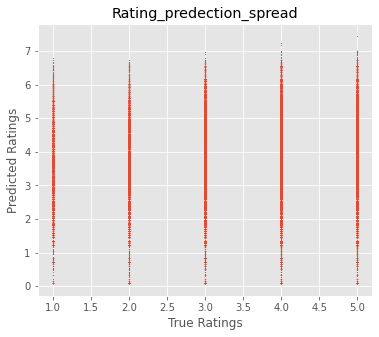

In [70]:
plt.figure(figsize=(6,5))
plt.scatter(x=y_train, y=train_pred, s=0.3)
plt.title('Rating_predection_spread')
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')

In [61]:
mean_squared_error(y_train, train_pred, squared=False)

1.5746708099695483